# Level-3(Task-2)

# Customer Preferences Analysis

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

## Load the dataset

### Display first 5 rows

In [2]:
# Load dataset
df = pd.read_csv('c:/Users/Usha/Downloads/dataset.csv.csv')

# Display first 5 rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant_Name_Length,Address_Length,Has_Table_Booking,Has_Online_Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0


## Encode categorical features

In [3]:
# Encode categorical features
le = LabelEncoder()
df['Has Table booking'] = le.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = le.fit_transform(df['Has Online delivery'])

## Display transformed dataset

### Select relevant features for regression modelling

In [4]:
# Display transformed dataset
df.head()

# Select relevant features for regression modeling
X = df[['Votes', 'Price range', 'Has Table booking', 'Has Online delivery']]
Y = df['Aggregate rating']

## Split the dataset into training and testing sets

### Define models for experimentation

In [5]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define models for experimentation
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

## Train and evaluate models

### Calculate evaluation metrics& print performance metrics

In [6]:
# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Print performance metrics
    print(f"Model: {model_name}")
    print(f"Train R-squared: {r2_train:.4f}")
    print(f"Test R-squared: {r2_test:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Test R-squared Score: {r2:.4f}")
    print("---------------------------")


Model: Linear Regression
Train R-squared: 0.2625
Test R-squared: 0.2633
Mean Squared Error: 1.6768
Test R-squared Score: 0.2633
---------------------------
Model: Decision Tree
Train R-squared: 0.9752
Test R-squared: 0.9150
Mean Squared Error: 0.1934
Test R-squared Score: 0.9150
---------------------------
Model: Random Forest
Train R-squared: 0.9719
Test R-squared: 0.9317
Mean Squared Error: 0.1554
Test R-squared Score: 0.9317
---------------------------


In [7]:
top_cuisinesall = df['Cuisines'].value_counts().head(10)
top_cuisinesall

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

In [8]:
top_cuisines = df['Cuisines'].value_counts().head(15)
top_cuisines

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
South Indian                      112
Bakery, Fast Food                 108
Name: count, dtype: int64

#  Analysis: Relationship Between Cuisine and Ratings

C:\Users\Usha\AppData\Local\Temp\ipykernel_14272\2881885635.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Cuisines', y='Aggregate rating',palette=palette)


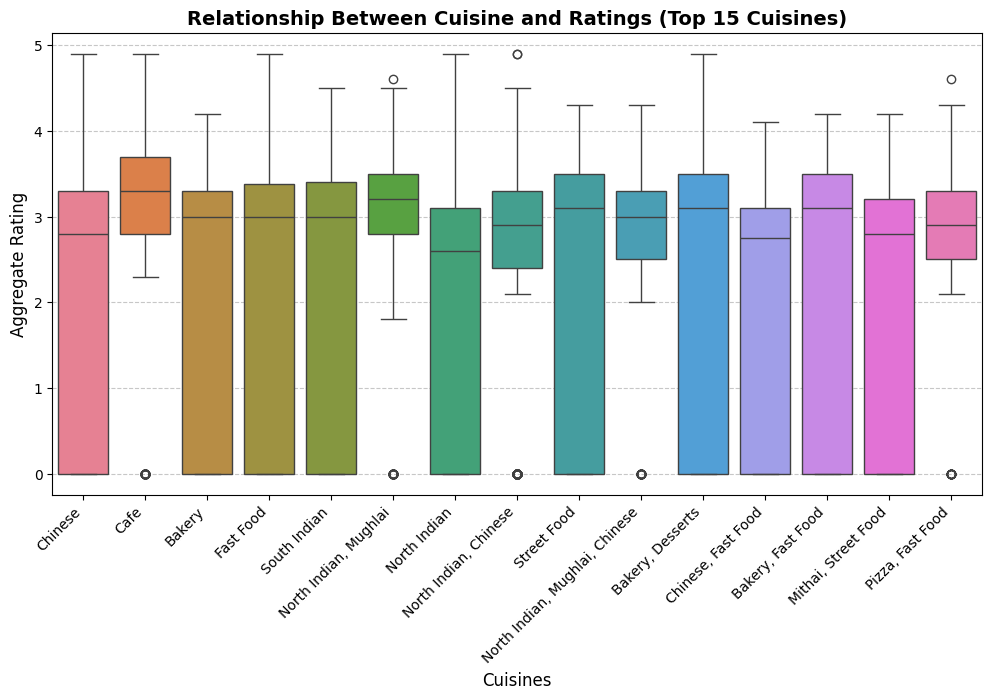

In [9]:
top_n=15
top_cuisines = df['Cuisines'].value_counts().nlargest(top_n).index# Filter dataset for top cuisines
df_filtered = df[df['Cuisines'].isin(top_cuisines)]
# Analysis: Relationship Between Cuisine and Ratings
# Create a box plot of cuisines vs ratings
palette=sns.color_palette("husl",n_colors=top_n)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Cuisines', y='Aggregate rating',palette=palette)
#Set labels
plt.title(f'Relationship Between Cuisine and Ratings (Top {top_n} Cuisines)',fontsize=14,fontweight='bold')
plt.xlabel('Cuisines',fontsize=12)
plt.ylabel('Aggregate Rating',fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Top 10 cuisines with highest ratings

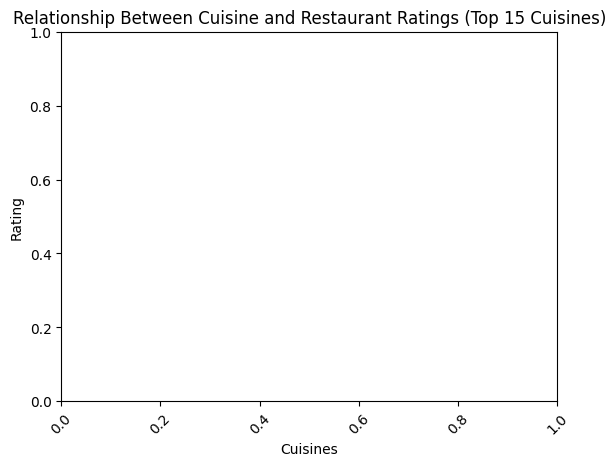

Top Cuisines by Number of Votes:
 Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


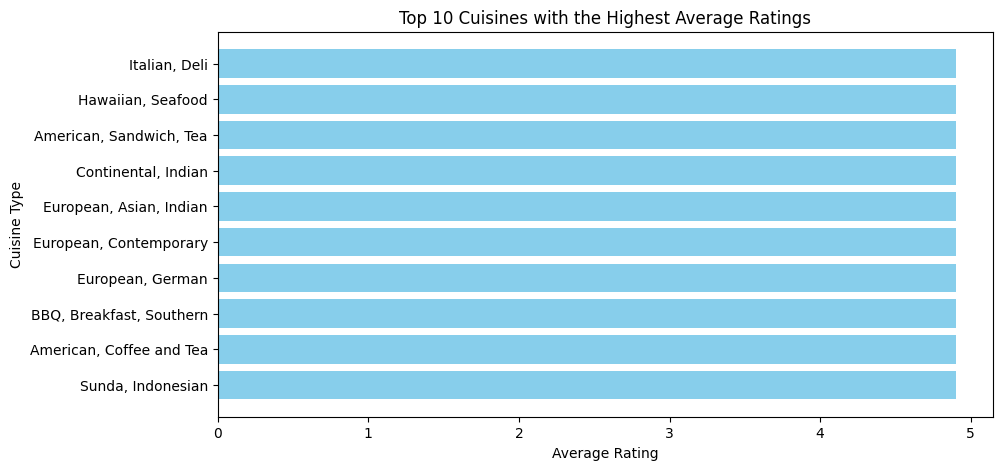

In [ ]:
# Set plot labels
plt.title(f'Relationship Between Cuisine and Restaurant Ratings (Top {top_n} Cuisines)')
plt.xlabel('Cuisines')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()
# Identify the most popular cuisines by votes
top_cuisines_votes = df.groupby('Cuisines')['Votes'].sum().nlargest(10)
print("Top Cuisines by Number of Votes:\n", top_cuisines_votes)

# Find cuisines with the highest average ratings
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Plot top 10 cuisines with highest ratings
plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='skyblue')

# Set labels and title
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines with the Highest Average Ratings')
plt.gca().invert_yaxis()
plt.show()

## Task-2 of Level-3 is completed!